![Tracked_Logo](img/logo.png)

<h1><center>Welcome to the Regex Practice Case Study</center></h1>

<b> In this Track Stop, you've covered regular expressions and how we can make use of them to identify patterns in the dataframe as well as how to Interpolate and fill in missing values/gaps in a dataset </b>

<b> We've pulled together a mini practice exercise using Soy Bean Commodity Data that you'll have to clean up and analyse below! </b>


<img src = "https://cdn.dribbble.com/users/1550532/screenshots/4863550/soja.gif">

<b> Before we start our data cleansing analysis, we'll have to understand what information we have in the dataframes. </b>

To do this, we'll first need to import the relevant libraries that allow us to explore our data sources. 
We'll need to import the following libraries at a minimum.

<ol>
  <li>Pandas</li>
  <li>Matplotlib</li>
  <li>Seaborn</li>
</ol>

<b><span style="color: #20b2aa"> Remember the syntax for importing libraries in Python is: </span>

<b> import library </b> 
<p>    

<i>Note: To set reasonable sized plots, don't forget to include the following line of code after you've imported matplotlib.</i>
matplotlib.rcParams['figure.figsize'] = (25,5) 

<b><span style="color: #20b2aa">Place your answer below here </style></b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

mpl.rcParams['figure.figsize'] = (25,5)

Now that you've imported the libraries, it's time to load this into a dataframe. 
Load the Soybean csv file into a dataframe.

Upon loading of this, explore the dataframe briefly.
<h3> Question 1 </h3>

You've noticed that the Commodity Column in your Dataset has a peculiarity.

It has the following items:

<li> Soy_Commodity 
<li> Soy_Bean_Commodity
<li> Mung_Bean_Commodity_Soy_  
<li> Soy_Beann_Commodity
<li> Soybean_Commodity

When in fact, it should only be called Soybean_Commodity.
    
Using the skill(s) you've learnt so far and the .replace() function - please replace all other values with Soybean_Commodity.

<b> Before starting this question, we recommend you take a look at the Syntax Assistance below that will guide you on how to tackle this as a refresher. </b>


In [2]:
soy_df = pd.read_csv('C:\\Users\\14087\\Soy Bean Regex Assignment\\Data_Prep_Soy_Bean_Cleansing.csv')

soy_df2 = pd.read_csv('C:\\Users\\14087\\Soy Bean Regex Assignment\\Data_Prep_Soy_Bean_Cleansing.csv')

In [3]:
soy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OPR_DATE          99 non-null     object
 1   Commodity_Traded  99 non-null     object
 2   Contract_Traded   99 non-null     object
 3   VALUE             97 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [4]:
soy_df.head(30)

,OPR_DATE,Commodity_Traded,Contract_Traded,VALUE
0,3/10/2018 0:00,Soy_Commodity,Mar-19,$83.48
1,3/10/2018 0:00,Soy_Bean_Commodity,Mar-19,$83.11
2,3/10/2018 0:00,Mung_Bean_Commodity_Soy_,Apr-19,$83.80
3,3/10/2018 0:00,Soy_Bean_Commodity,May-19,$82.72
4,3/10/2018 0:00,Soy_Beann_Commodity,Jun-19,$81.49
5,3/10/2018 0:00,Soy_Commodity,Jul-19,$80.27
6,3/10/2018 0:00,Soy_Beann_Commodity,Mmar-19,$82.11
7,3/10/2018 0:00,Soy_Beann_Commodity,Apr-19,$79.68
8,3/10/2018 0:00,Mung_Bean_Commodity_Soy_,Junnn-19,-$12.06
9,3/10/2018 0:00,Mung_Bean_Commodity_Soy_,Jul-19,$77.34


<h3 style="color:#20b2aa"> 1. Replacing Data with Regex</h3>

Replacing Data with the .replace function is useful for <b> small </b> modifications to a dataframe.

In this exercise we'll take a look at how we can use the .replace() methodology and combine this with the regex argument.

Firstly, we'll need to define what the correct records/entries in each dataframe should be and store this in a list for our reference. 

For example, imagine if we have the following entries:

<ol>
    <li> Corn Bread </li>
    <li> C0rn Br3ad </li>
    <li> C0n Bre33d </li>
       
</ol>

In short, they all read as some permutation of Corn Bread, however we can deduce that the correct entry would be Corn Bread.

We can prepare a list that contains the right entries here:

    correctEntries = ["Corn Bread"]

Similarly, we can prepare a list that contains all the <b>*incorrect*</b> entries and use this as a guide for us to correct all the incorrect spellings.

    incorrectEntries = ['C0rn Br3ad','C0n Bre33d']

We can then make use of the .replace and regex function to replace the data in our dataframe.

    dataframe['column'].replace("incorrectEntry","correctEntry", regex=True, inplace=True)
    
<b> Using the example above we could then do:</b>
    
    dataframe['ColumnOfInterest'].replace("C0rn Br3ad","Corn Bread", regex=True, inplace=True) 
    
    
<b><span style="color: Purple">It is important to note that without specifying **regex = True** the replacement of the incorrect entry with the correct entry will not take place. </span> </b>

Now you're armed with this information - give it a try!

<b><span style="color: #20b2aa">Place your answer below here </style></b>

In [5]:
soy_df['Commodity_Traded'].unique()

array(['Soy_Commodity ', 'Soy_Bean_Commodity',
       'Mung_Bean_Commodity_Soy_  ', '  Soy_Beann_Commodity',
       'Soybean_Commodity'], dtype=object)

In [6]:
correctEntry = ['Soybean_Commodity']
incorrectEntries = ['Soy_Commodity ', 'Soy_Bean_Commodity',
       'Mung_Bean_Commodity_Soy_  ', '  Soy_Beann_Commodity',
       'Soybean_Commodity']

soy_df['Commodity_Traded'].replace('Soy_Commodity ', 'Soybean_Commodity', regex=True, inplace=True)
soy_df['Commodity_Traded'].replace('Soy_Bean_Commodity', 'Soybean_Commodity', regex=True, inplace=True)
soy_df['Commodity_Traded'].replace('Mung_Bean_Commodity_Soy_  ', 'Soybean_Commodity', regex=True, inplace=True)
soy_df['Commodity_Traded'].replace('Soy_Beann_Commodity', 'Soybean_Commodity', regex=True, inplace=True)
soy_df['Commodity_Traded'].replace('  Soybean_Commodity', 'Soybean_Commodity', regex=True, inplace=True)

In [7]:
soy_df['Commodity_Traded'].unique()

array(['Soybean_Commodity'], dtype=object)

<span style="color: #da9100"> As we mentioned earlier, if you have a *small number* of entries that need to be replaced then .replace is fine.     
However, if you have many - you might be better off using a cleaner alternative known as **dictionaries**. </span>


<h3 style="color:#20b2aa"> 2. Dictionary Mapping </h3>

As you would have learnt earlier, Dictionaries use key-value pair relationships where once you provide the 'key', you can extract the associated value. 

**This might not make sense immediately so think of it as a VLOOKUP, but *in Python*.** 

We're going to offer a quick refresher regarding how to make use of the .map() function and how this works with our dictionary objects in Python.

The .map function essentially *binds* what you searching against the item it will replace.

Say for example, I had the following:

<b>exampleDict: </b>

    {
    "One": 1,
    "Two":2
    }
    
If I have a dataframe that contains the values "One" and "Two" and I want to have them replaced with numbers, I can then simply go:

    dataframe['ColumnWithNumbers'].map(exampleDict)
    
This tells Python to act on the dataframe, specifically the column called 'ColumnWithNumbers', and for every entry that has "one" or "two" - replace this with the value, 1 and 2 (Hence the concept behind Key-Value Pair mappings).

If you need extra assistance, take a look at the following link:

https://chrisalbon.com/python/data_wrangling/pandas_map_values_to_values/


<h3> Question Two </h3>

You've observed the Contract_Traded Column and observed how there seems to be some typo(s) that exist in the Column. Previously you've sough to use .replace(), but this time you've decided to use <b> dictionary mapping </b> to help you out with cleaning this column.

<b> Using your new-found knowledge of how .map() works (as demonstrated below), replace all the typos that currently exist in the Contract_Traded Column.


<b><span style="color: #20b2aa">Place your answer below here </style></b>

In [8]:
soy_df['Contract_Traded'].unique()

array(['Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Mmar-19',
       'Junnn-19', 'Juley-19', 'Desemb-19', 'Dec-19', 'Janeury-19',
       'Feb-19', 'Febb-19'], dtype=object)

In [9]:
mapping_dict = {
    'Mar-19' : 'Mar-19', 
    'Apr-19' : 'Apr-19', 
    'May-19' : 'May-19', 
    'Jun-19' : 'Jun-19', 
    'Jul-19' : 'Jul-19', 
    'Mmar-19' : 'Mar-19',
    'Junnn-19' : 'Jun-19', 
    'Juley-19' : 'Jul-19', 
    'Desemb-19' : 'Dec-19', 
    'Dec-19' : 'Dec-19', 
    'Janeury-19' : 'Jan-19',
    'Feb-19' : 'Feb-19', 
    'Febb-19' : 'Feb-19'
}

soy_df['Contract_Traded'] = soy_df['Contract_Traded'].map(mapping_dict)

In [10]:
soy_df['Contract_Traded'].unique()

array(['Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Dec-19',
       'Jan-19', 'Feb-19'], dtype=object)

<h3> Question Three </h3>

Now we come to the final question of our three (3) part mini challenge.

<b> Interpolation </b>

Previously you learnt how to proceed with time series interpolation and how to fill in <b> missing gaps in a series of data </b>.

However, if you plot out the VALUE Column, you would observe that there are some <b> negative price periods </b> in the dataset. 

This represents an anomaly which shouldn't be occurring as Soy Beans shouldn't be traded for Negative Value. 

<b>
This brings us to our final question where you'll need to perform the following:
<p>
i) Please replace all negative values in the VALUE Column with a blank (i.e. " ")
    <p>
ii) Using Linear Interpolation, <b> fill in all the blanks in the dataset 
        </b>

<b> Hint: You may find this link <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html"> here </a> helpful to solve the Interpolation Challenge you're facing. </b>


<b><span style="color: #20b2aa">Place your answer below here </style></b>

In [11]:
soy_df.columns

Index(['OPR_DATE', 'Commodity_Traded', 'Contract_Traded', 'VALUE'], dtype='object')

In [12]:
soy_df['VALUE'] = soy_df['VALUE'].str.replace('$', '')
soy_df['VALUE'].unique()

array(['83.48', '83.11', '83.80', '82.72', '81.49', '80.27', '82.11',
       '79.68', '-12.06', '77.34', '84.59', '84.24', nan, '83.69',
       '83.37', '83.68', '82.64', '81.46', '80.28', '82.05', '-19.71',
       '82.01', '77.44', '77.77', '76.69', '75.61', '80.25', '78.31',
       '76.15', '78.28', '80.89', '80.53', '80.24', '79.97', '79.67',
       '79.96', '78.96', '77.82', '76.70', '78.39', '78.36', '73.97',
       '79.77', '79.43', '79.19', '78.94', '78.67', '78.93', 'error',
       '76.91', '75.86', '74.85', '79.37', '77.45', '75.35', '77.42',
       '73.26', '80.62', '80.04', '79.79', '79.51', '79.78', '78.84',
       '77.75', '76.67', '80.22', '78.30', '76.14', '78.26', '74.05',
       '83.91', '83.45', '83.18', '82.86', '83.44', '82.50', '81.35',
       '80.19', '79.06', '81.93', '79.62', '72.92', '72.82', '72.64',
       '72.44', '72.22', '72.90', '72.43', '71.42', '68.58', '76.35',
       '76.17'], dtype=object)

In [13]:
#soy_df.loc[soy_df['VALUE'].str.contains("-", "VALUE")]= np.NaN
# pd.option_context('display.max_rows',100)

# soy_df2['Numerical_Check'] = (soy_df2['VALUE'].str.contains('^[0-9]*'))

#^ - Matching the Start of the Value
#[0-9] Should include any value that contains 0 - 9 
#* - Greedy Quantifier. One or More.

In [14]:
#replaced empty strings and 'error' with np.NaN
soy_df['VALUE'].replace('', np.NaN, regex=True, inplace=True)
soy_df['VALUE'].replace('error', np.NaN, regex=True, inplace=True)


#identified rows with negative values and created a column with boolean to indentify negative values
soy_df['negative'] = soy_df['VALUE'].str.contains("-", "VALUE")

In [15]:
soy_df[soy_df['negative']==True]

,OPR_DATE,Commodity_Traded,Contract_Traded,VALUE,negative
8,3/10/2018 0:00,Soybean_Commodity,Jun-19,-12.06,True
20,4/10/2018 0:00,Soybean_Commodity,Apr-19,-19.71,True


In [16]:
#assigned NaN to negative values

soy_df.loc[8 , 'VALUE'] = np.NaN
soy_df.loc[20 , 'VALUE'] = np.NaN

In [17]:
soy_df[soy_df['negative']==True]

,OPR_DATE,Commodity_Traded,Contract_Traded,VALUE,negative
8,3/10/2018 0:00,Soybean_Commodity,Jun-19,NaN,True
20,4/10/2018 0:00,Soybean_Commodity,Apr-19,NaN,True


In [18]:
#converted 'VALUE' column to float type
soy_df['VALUE'] = soy_df['VALUE'].astype(float)

In [19]:
#interploted NAN values
soy_df['VALUE'] = soy_df['VALUE'].interpolate(method='linear')

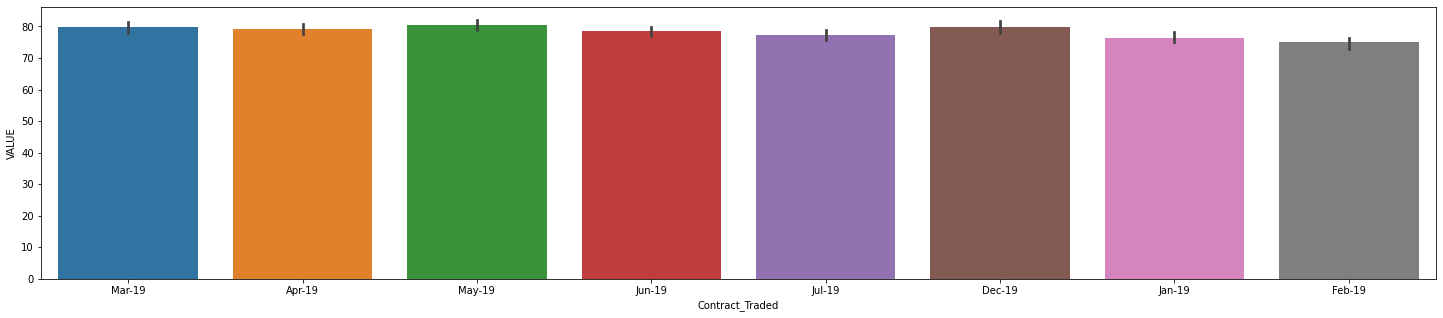

In [25]:
sns.barplot(x='Contract_Traded', y='VALUE', data=soy_df)
plt.show()

![Tracked_Logo](img/finish_run.png)
<b><center>And we're done with mini Data Cleansing assignment Woohoo! </center></b>

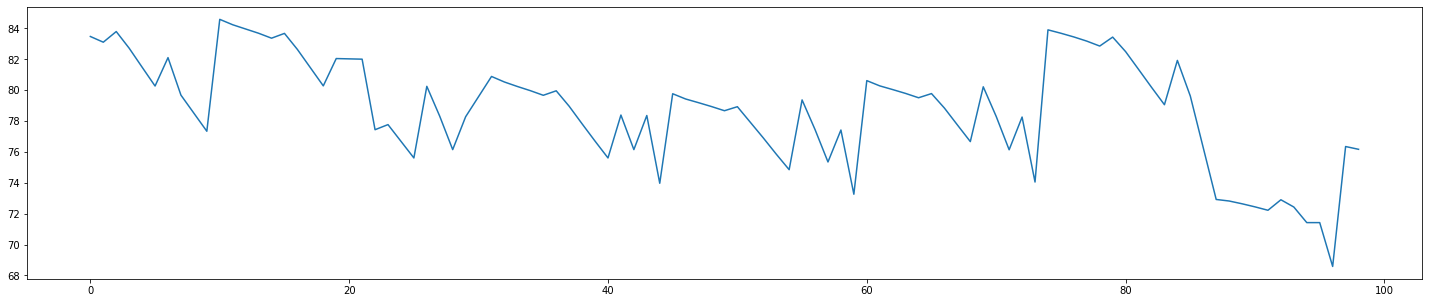

In [27]:
soy_df["VALUE"].plot.line()
plt.show()